## **DATA COLLECTION**

**Loading the Dataset**

In [2]:
import pandas as pd

In [3]:
titanic_data =pd.read_csv('Titanic-Dataset.csv')

In [4]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data = titanic_data[['Survived','Pclass','Sex','Age','Fare','Cabin']]

**Classify Categorical and Numerical Columns**

In [7]:
categorical_columns = []
numerical_columns = []

for column in data.columns:
    if data[column].dtype == 'object' or column == 'Survived':
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)

### **DATA PREPROCESSING**

**Data Cleaning**

In [8]:
data.isnull().any()

Survived    False
Pclass      False
Sex         False
Age          True
Fare        False
Cabin        True
dtype: bool

In [9]:
data.fillna(0,inplace=True)

<ipython-input-9-964390382314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(0,inplace=True)


In [10]:
data.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
Fare        False
Cabin       False
dtype: bool

**Outlier Detection and Removal**

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
def outlier(str,column):
  plt.figure(figsize=(8,6))
  sns.boxplot(data[column])
  plt.title(f'Box Plot of {column} {str}')
  plt.show()


Before Removing Outliers


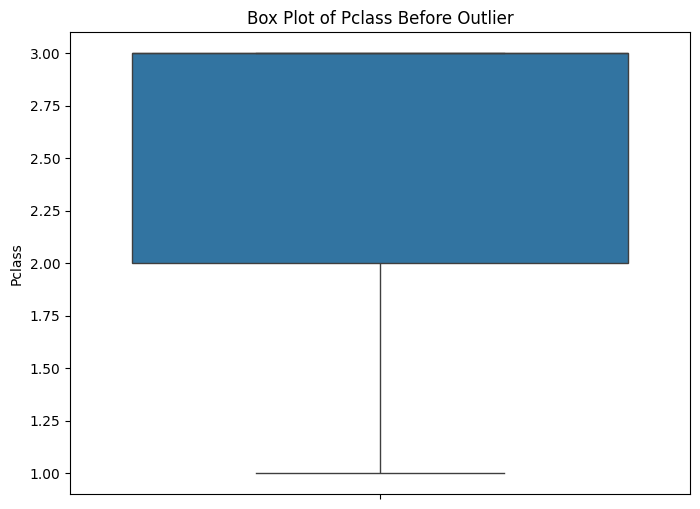

After Removing Outliers


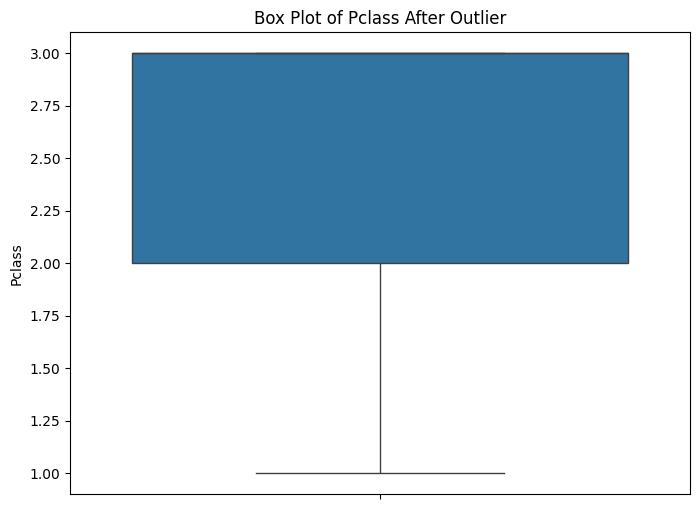

Before Removing Outliers


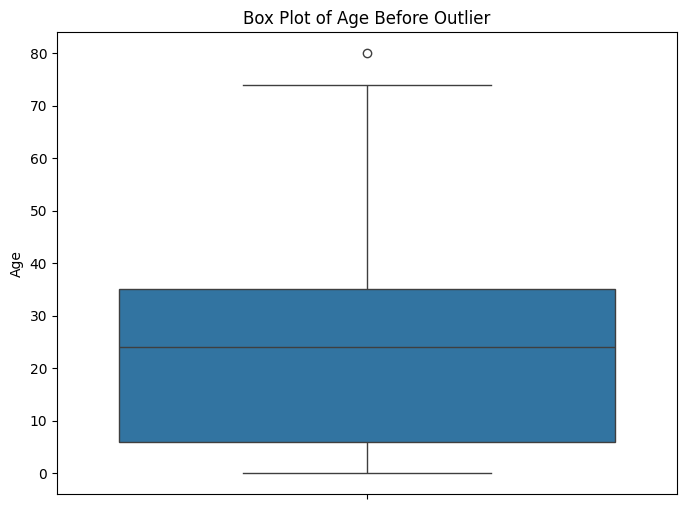

After Removing Outliers


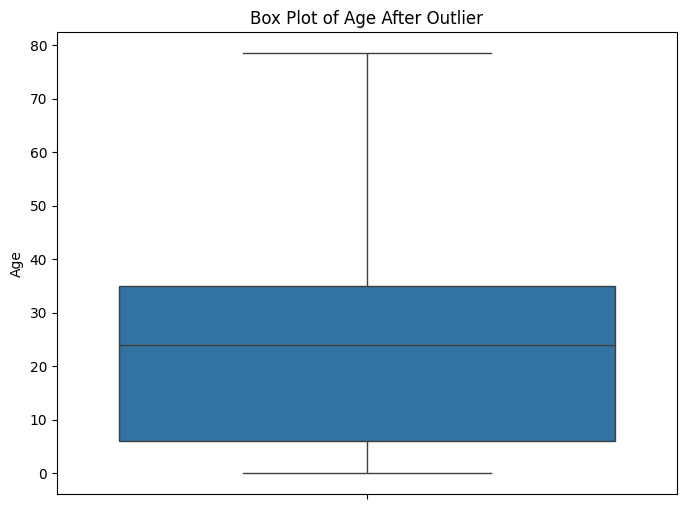

Before Removing Outliers


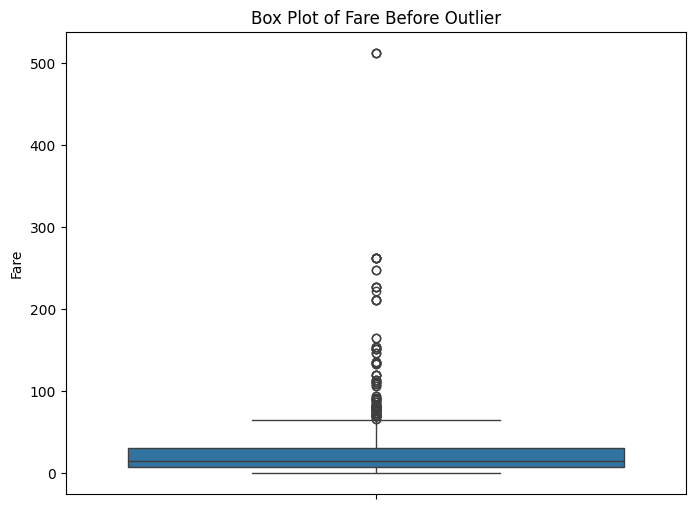

After Removing Outliers


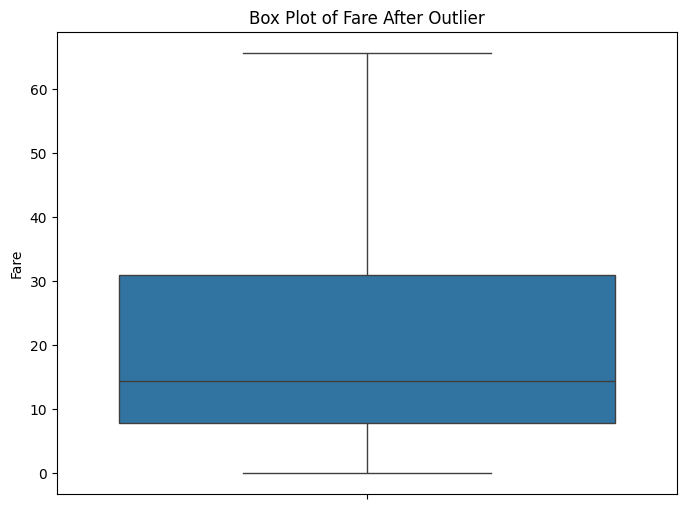

In [13]:
for column in numerical_columns:
  print("Before Removing Outliers")

  outlier('Before Outlier',column)

  print("After Removing Outliers")

  #outlier is removed using iqr capping method
  q1 = data[column].quantile(0.25)
  q3 = data[column].quantile(0.75)
  iqr = q3-q1
  lb = q1 - 1.5 * iqr
  ub = q3 + 1.5 * iqr
  data.loc[(data[column] < lb),column] = lb
  data.loc[(data[column] > ub),column] = ub

  outlier('After Outlier',column)

## **DATA VISUALISATION**

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    float64
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Cabin     891 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 41.9+ KB


**Number of Survivors by Sex**

Sex
female    233
male      109
Name: Survived, dtype: int64


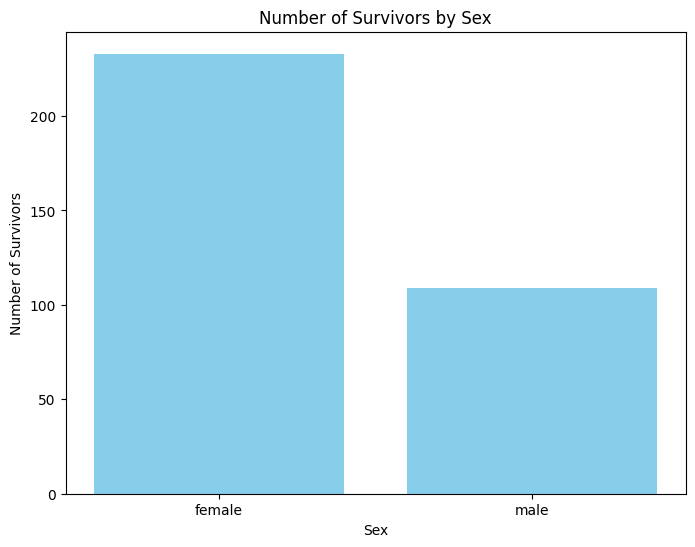

In [15]:
# Calculate the number of males and females who survived
survival_by_sex = data.groupby('Sex')['Survived'].sum()
print(survival_by_sex)

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(survival_by_sex.index, survival_by_sex.values, color='skyblue')

plt.xlabel('Sex')
plt.ylabel('Number of Survivors')
plt.title('Number of Survivors by Sex')

plt.show()

**Age-wise Survival Proportions**

<ipython-input-16-780bcb9a9130>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)


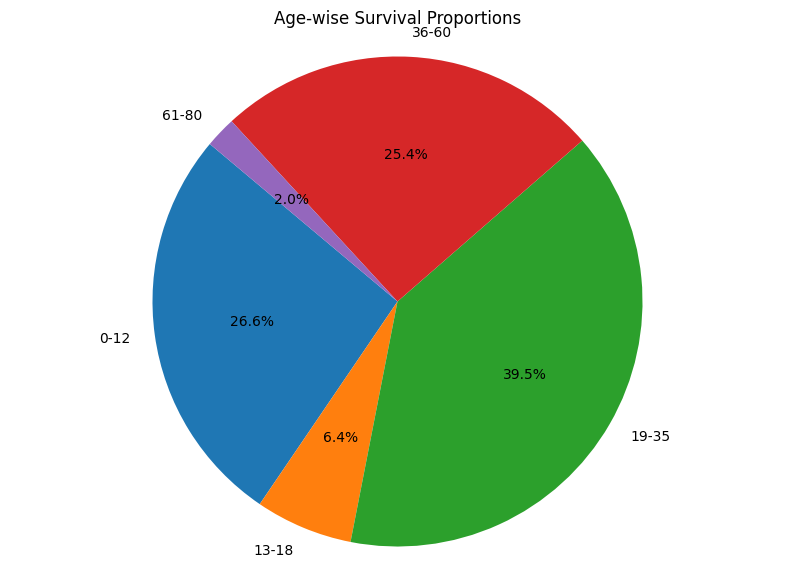

In [16]:
# Define age bins
bins = [0, 12, 18, 35, 60, 80]
labels = ['0-12', '13-18', '19-35', '36-60', '61-80']

# Create a new column for age groups
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Aggregate survival counts by age group
age_group_survival = data[data['Survived'] == 1]['Age Group'].value_counts().sort_index()

# Handle any missing values in age_group_survival
age_group_survival = age_group_survival.reindex(labels, fill_value=0)

# Check for any NaN values and replace them with zero
age_group_survival = age_group_survival.fillna(0)

# Plot the pie chart
plt.figure(figsize=(10, 7))
plt.pie(age_group_survival, labels=age_group_survival.index, autopct='%1.1f%%', startangle=140)
plt.title('Age-wise Survival Proportions')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


## **MODEL SELECTION AND MODEL EVALUATION**

In [17]:
data['Survived'] = data['Survived'].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Survived   891 non-null    object  
 1   Pclass     891 non-null    float64 
 2   Sex        891 non-null    object  
 3   Age        891 non-null    float64 
 4   Fare       891 non-null    float64 
 5   Cabin      891 non-null    object  
 6   Age Group  891 non-null    category
dtypes: category(1), float64(3), object(3)
memory usage: 43.0+ KB


<ipython-input-17-0eb1e3922811>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Survived'] = data['Survived'].astype(str)


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay,precision_recall_curve, roc_curve, roc_auc_score,auc
from sklearn.preprocessing import StandardScaler,LabelEncoder


**Label Encoding**

In [20]:
encoding= {}
encoder = LabelEncoder()

for column in categorical_columns:
  data[column] = data[column].astype(str)
  data[column] = encoder.fit_transform(data[column])
  encoding[column] = dict(zip(map(str.lower,encoder.classes_),encoder.transform(encoder.classes_)))
  print(f"{column} : {encoding[column]}")


Survived : {'0': 0, '1': 1}
Sex : {'female': 0, 'male': 1}
Cabin : {'0': 0, 'a10': 1, 'a14': 2, 'a16': 3, 'a19': 4, 'a20': 5, 'a23': 6, 'a24': 7, 'a26': 8, 'a31': 9, 'a32': 10, 'a34': 11, 'a36': 12, 'a5': 13, 'a6': 14, 'a7': 15, 'b101': 16, 'b102': 17, 'b18': 18, 'b19': 19, 'b20': 20, 'b22': 21, 'b28': 22, 'b3': 23, 'b30': 24, 'b35': 25, 'b37': 26, 'b38': 27, 'b39': 28, 'b4': 29, 'b41': 30, 'b42': 31, 'b49': 32, 'b5': 33, 'b50': 34, 'b51 b53 b55': 35, 'b57 b59 b63 b66': 36, 'b58 b60': 37, 'b69': 38, 'b71': 39, 'b73': 40, 'b77': 41, 'b78': 42, 'b79': 43, 'b80': 44, 'b82 b84': 45, 'b86': 46, 'b94': 47, 'b96 b98': 48, 'c101': 49, 'c103': 50, 'c104': 51, 'c106': 52, 'c110': 53, 'c111': 54, 'c118': 55, 'c123': 56, 'c124': 57, 'c125': 58, 'c126': 59, 'c128': 60, 'c148': 61, 'c2': 62, 'c22 c26': 63, 'c23 c25 c27': 64, 'c30': 65, 'c32': 66, 'c45': 67, 'c46': 68, 'c47': 69, 'c49': 70, 'c50': 71, 'c52': 72, 'c54': 73, 'c62 c64': 74, 'c65': 75, 'c68': 76, 'c7': 77, 'c70': 78, 'c78': 79, 'c82': 80

<ipython-input-20-fe06df1458c5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].astype(str)
<ipython-input-20-fe06df1458c5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = encoder.fit_transform(data[column])
<ipython-input-20-fe06df1458c5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [21]:
def val(column,value):
  return encoding[column][value]

In [22]:
# X as independent variables(input columns) and y as dependent varible(output columns)
X = data.drop('Survived',axis=1).drop('Age Group',axis=1)
y = data['Survived']


**Standard Scaler**

In [23]:
scaler = StandardScaler()

In [24]:
X = scaler.fit_transform(X)

In [25]:
# Data is splitted into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Logistic Regression**

In [26]:
log_model = LogisticRegression()

#training the model
log_model.fit(X_train, y_train)

#model is predicted with test data
log_pred = log_model.predict(X_test)

Accuracy :  0.7877094972067039


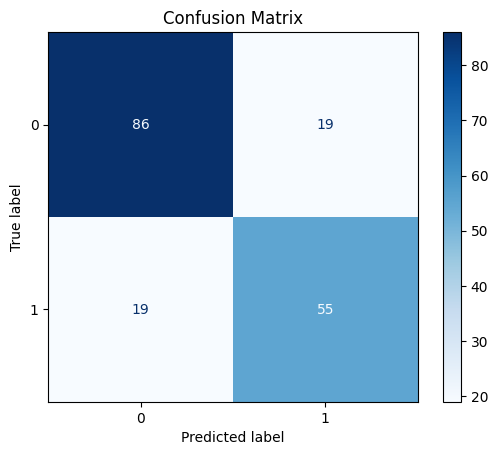

In [27]:

#computing the accuracy of the model
log_accuracy = accuracy_score(y_test, log_pred)
print("Accuracy : ", log_accuracy )

# Compute the confusion matrix
log_cm = confusion_matrix(y_test, log_pred)

# Plot the confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_model.classes_)
log_disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [28]:
# Print the classification report
print(classification_report(y_test, log_pred, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.82      0.82      0.82       105
    Survived       0.74      0.74      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



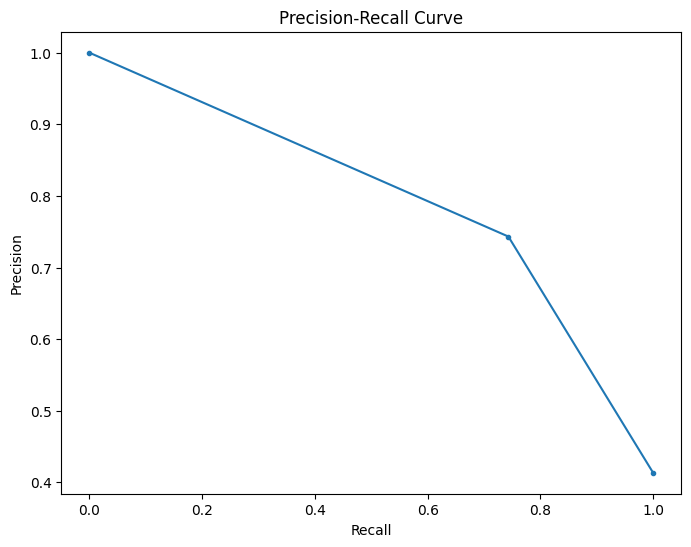

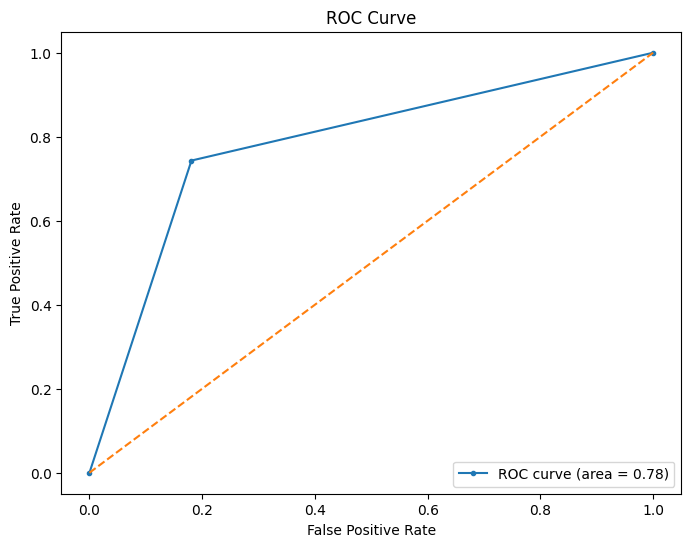

In [29]:

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, log_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, log_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

**KNeighborsClassifier**

In [30]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

Accuracy :  0.8212290502793296


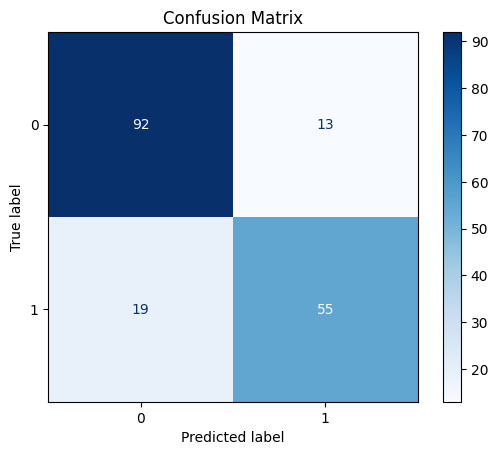

In [31]:
knn_accuracy = accuracy_score(y_test, knn_pred)
print("Accuracy : ", knn_accuracy )

knn_cm = confusion_matrix(y_test, knn_pred)

knn_disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=knn_model.classes_)
knn_disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [32]:
# Print the classification report
print(classification_report(y_test, knn_pred, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.83      0.88      0.85       105
    Survived       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



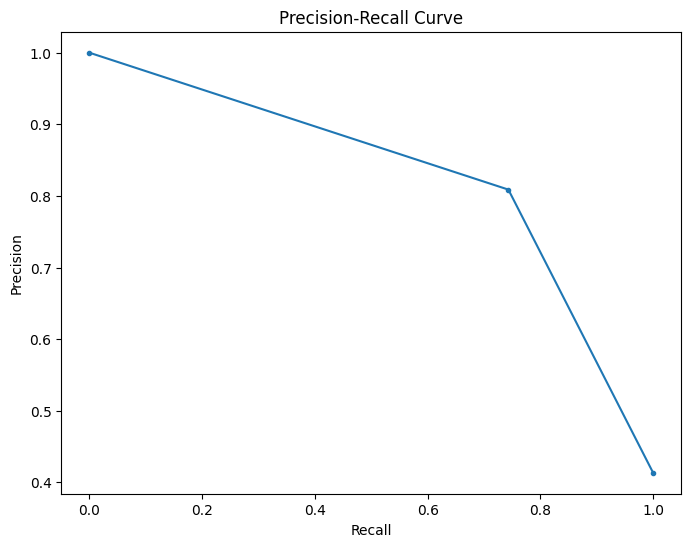

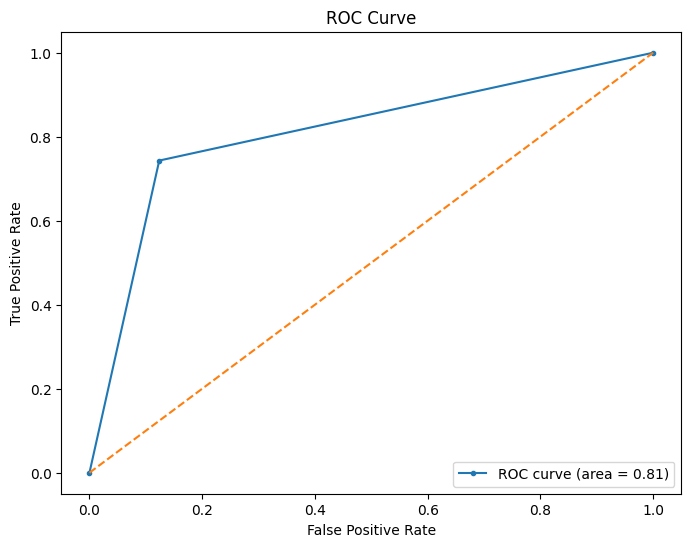

In [33]:

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, knn_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, knn_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

**DecisionTreeClassifier**

In [34]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

Accuracy :  0.7374301675977654


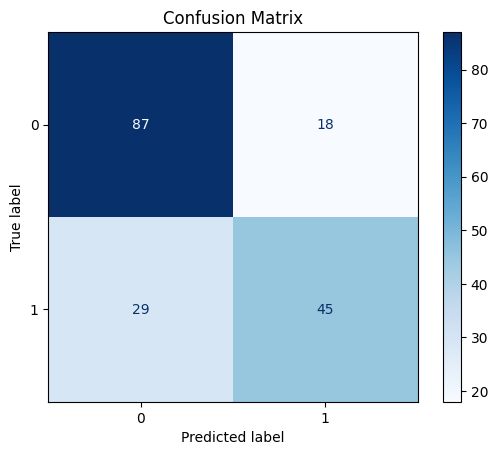

In [35]:
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Accuracy : ", dt_accuracy )

dt_cm = confusion_matrix(y_test, dt_pred)

dt_disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=dt_model.classes_)
dt_disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [36]:
# Print the classification report
print(classification_report(y_test, dt_pred, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.75      0.83      0.79       105
    Survived       0.71      0.61      0.66        74

    accuracy                           0.74       179
   macro avg       0.73      0.72      0.72       179
weighted avg       0.74      0.74      0.73       179



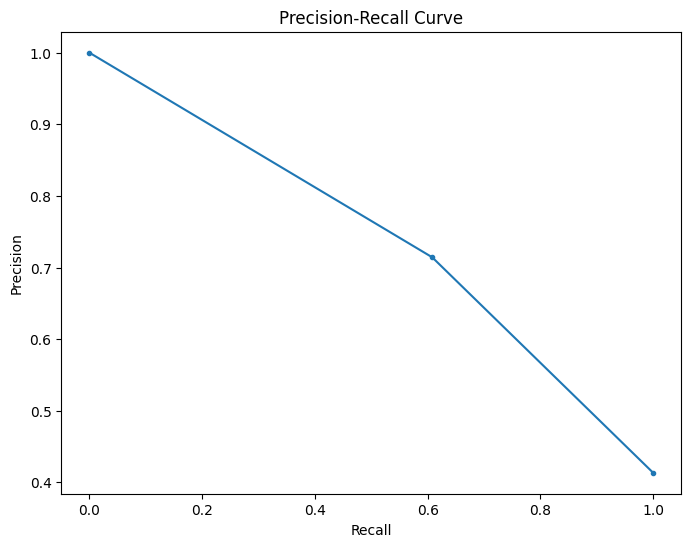

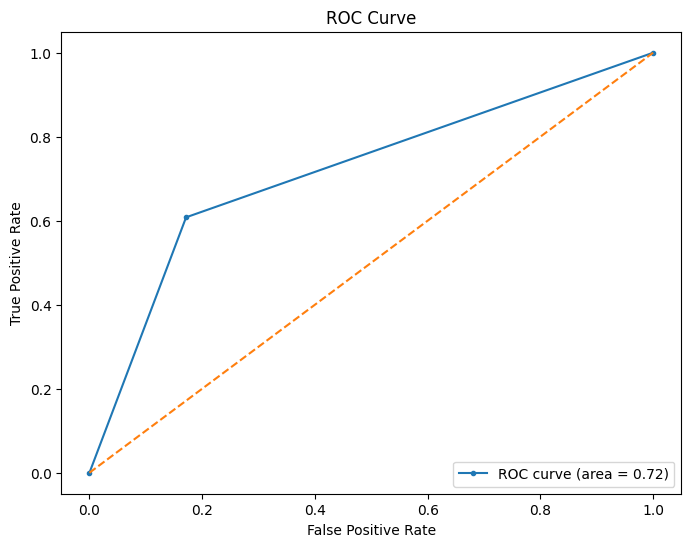

In [37]:

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, dt_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, dt_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

**RandomForestClassifier**

In [38]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

Accuracy :  0.7932960893854749


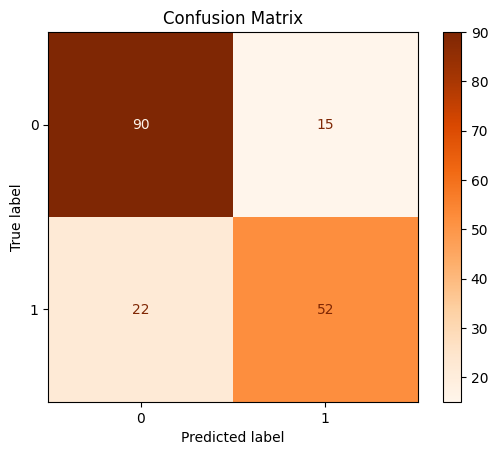

In [39]:
rf_accuracy = accuracy_score(y_test,rf_pred)
print("Accuracy : ", rf_accuracy)

rf_cm = confusion_matrix(y_test,rf_pred)

rf_disp = ConfusionMatrixDisplay(confusion_matrix = rf_cm, display_labels = rf_model.classes_)
rf_disp.plot(cmap=plt.cm.Oranges)
plt.title("Confusion Matrix")
plt.show()

In [40]:
# Print the classification report
print(classification_report(y_test, rf_pred, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.80      0.86      0.83       105
    Survived       0.78      0.70      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



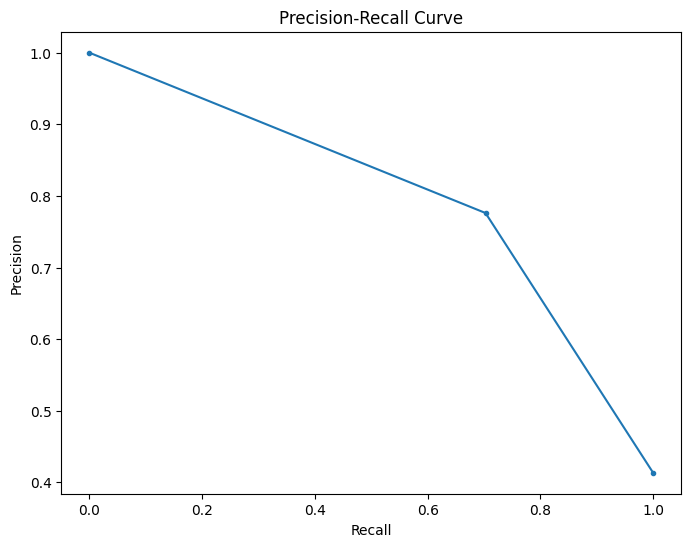

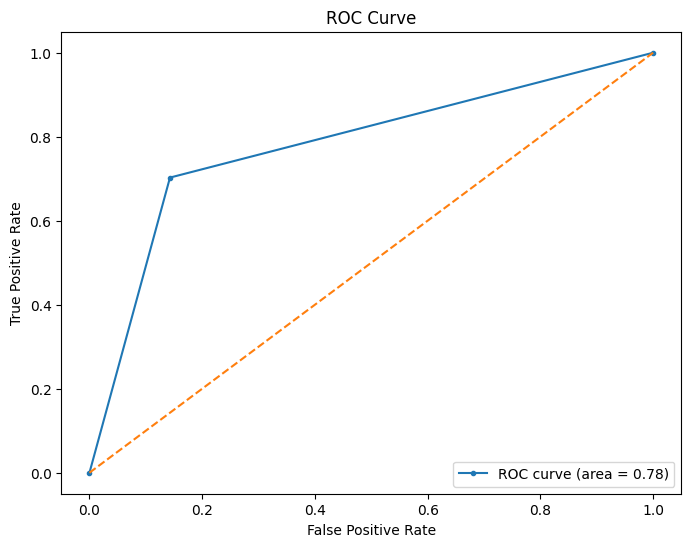

In [41]:

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, rf_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, rf_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

**GradientBoostingClassifier**

In [42]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

Accuracy :  0.8268156424581006


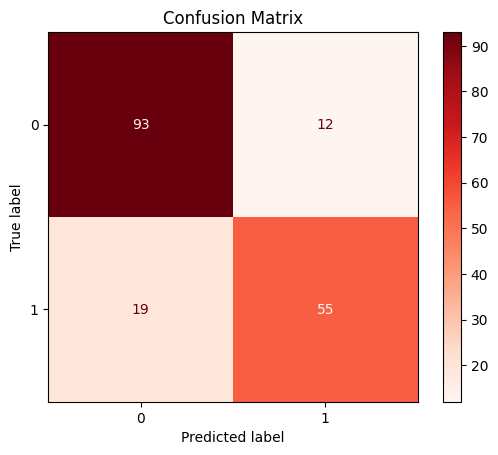

In [43]:
gb_accuracy = accuracy_score(y_test,gb_pred)
print("Accuracy : ", gb_accuracy)

gb_cm = confusion_matrix(y_test,gb_pred)

gb_disp = ConfusionMatrixDisplay(confusion_matrix = gb_cm, display_labels = gb_model.classes_)
gb_disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix")
plt.show()

In [44]:
# Print the classification report
print(classification_report(y_test, gb_pred, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.83      0.89      0.86       105
    Survived       0.82      0.74      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



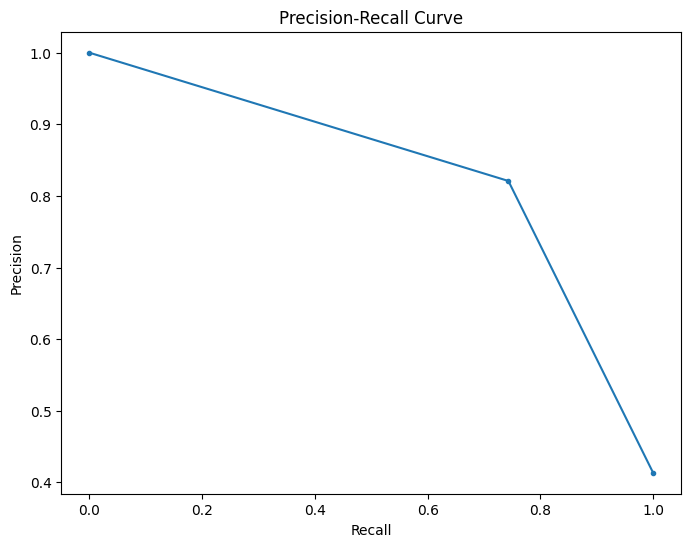

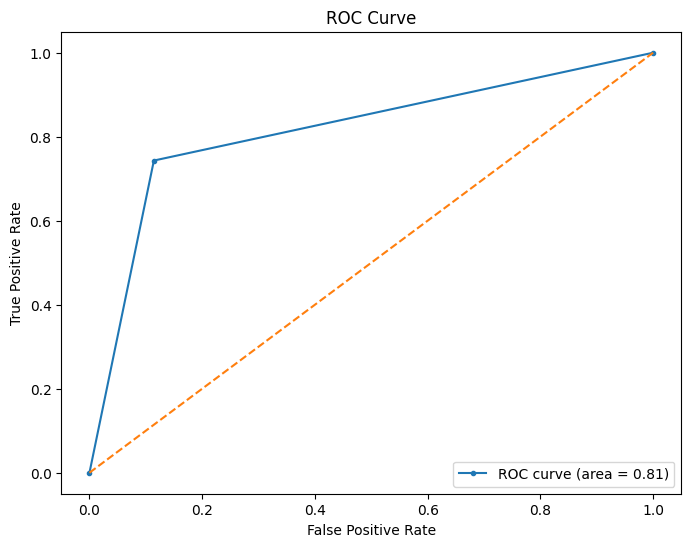

In [45]:

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, gb_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, gb_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

**AdaBoostClassifier**

In [46]:
ab_model = AdaBoostClassifier()
ab_model.fit(X_train, y_train)
ab_pred = ab_model.predict(X_test)

Accuracy :  0.7988826815642458


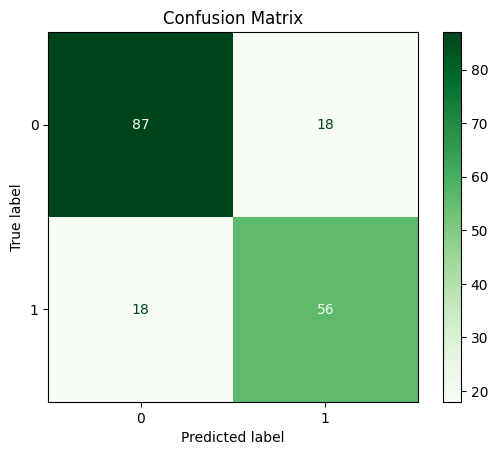

In [47]:
ab_accuracy = accuracy_score(y_test,ab_pred)
print("Accuracy : ", ab_accuracy)

ab_cm = confusion_matrix(y_test,ab_pred)

ab_disp = ConfusionMatrixDisplay(confusion_matrix = ab_cm, display_labels = ab_model.classes_)
ab_disp.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.show()

In [48]:
# Print the classification report
print(classification_report(y_test, ab_pred, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.83      0.83      0.83       105
    Survived       0.76      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



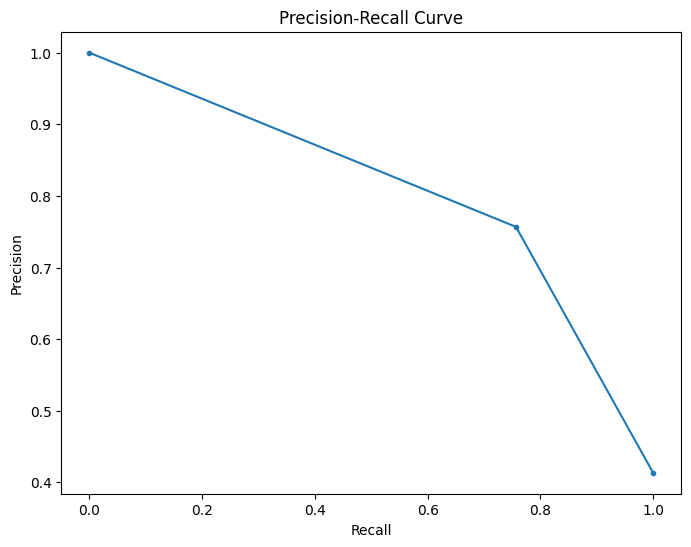

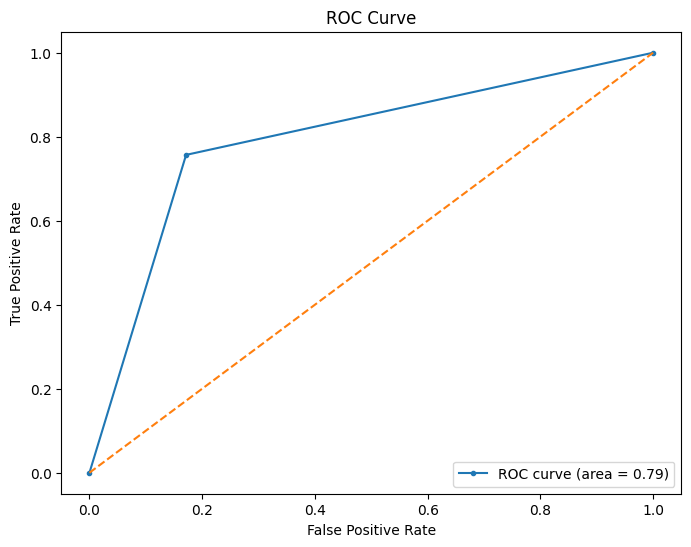

In [49]:

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, ab_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, ab_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

**XGBClassifier**

In [50]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

Accuracy :  0.7821229050279329


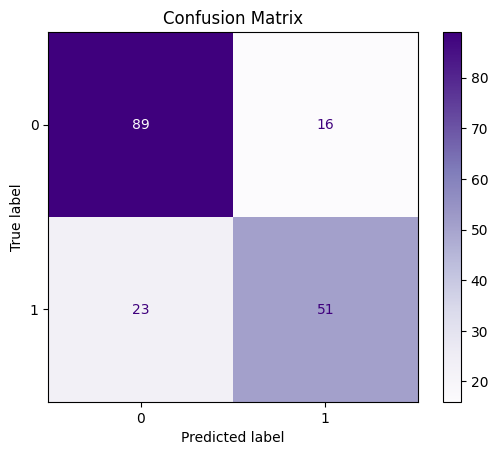

In [51]:
xgb_accuracy = accuracy_score(y_test,xgb_pred)
print("Accuracy : ", xgb_accuracy)

xgb_cm = confusion_matrix(y_test,xgb_pred)

xgb_disp = ConfusionMatrixDisplay(confusion_matrix = xgb_cm, display_labels = xgb_model.classes_)
xgb_disp.plot(cmap=plt.cm.Purples)
plt.title("Confusion Matrix")
plt.show()

In [52]:
# Print the classification report
print(classification_report(y_test, xgb_pred, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.79      0.85      0.82       105
    Survived       0.76      0.69      0.72        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



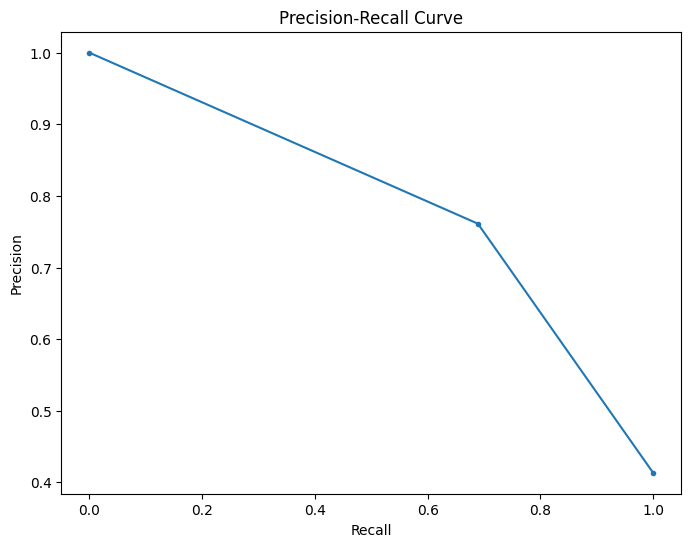

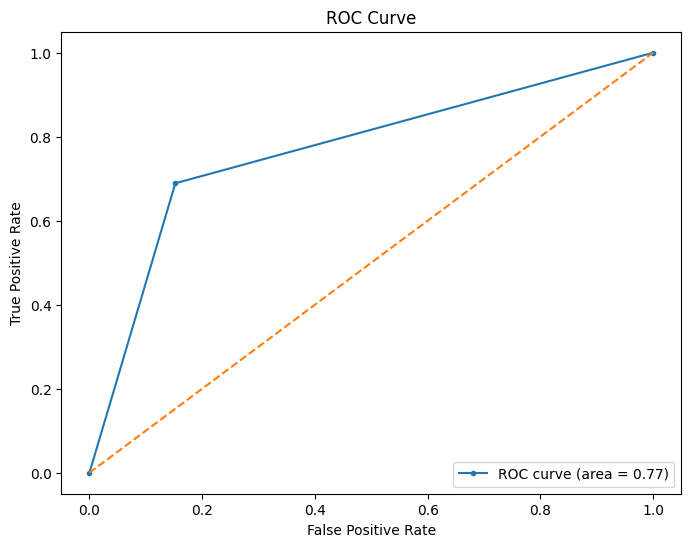

In [53]:

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, xgb_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, xgb_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

**SVC**

In [54]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)

Accuracy :  0.8212290502793296


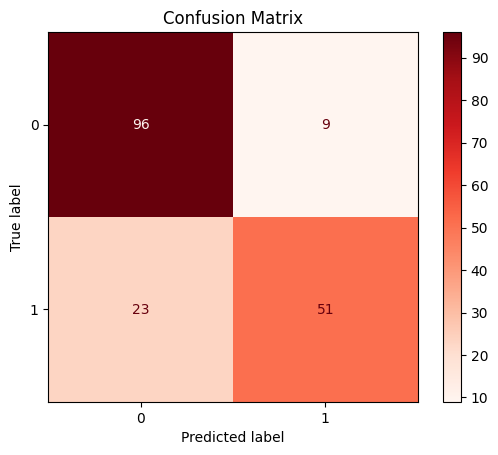

In [55]:
svc_accuracy = accuracy_score(y_test,svc_pred)
print("Accuracy : ", svc_accuracy)

svc_cm = confusion_matrix(y_test,svc_pred)

svc_disp = ConfusionMatrixDisplay(confusion_matrix = svc_cm, display_labels = svc_model.classes_)
svc_disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix")
plt.show()

In [56]:
# Print the classification report
print(classification_report(y_test, svc_pred, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.81      0.91      0.86       105
    Survived       0.85      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



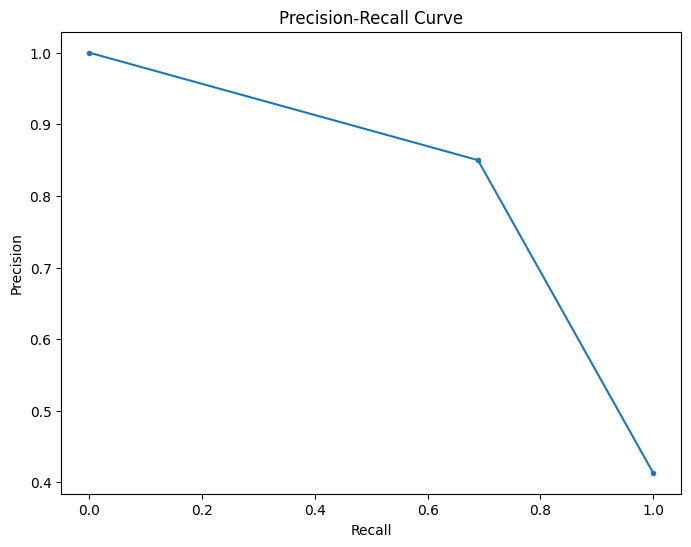

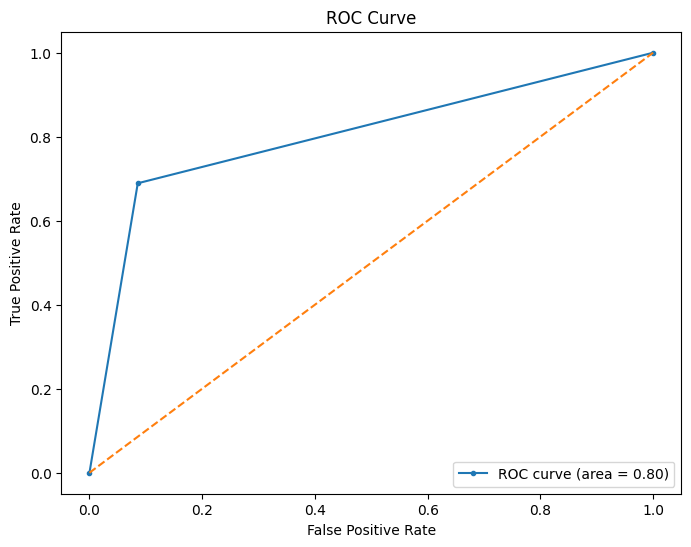

In [57]:

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, svc_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, svc_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

**GaussianNB**

In [58]:
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_pred = gnb_model.predict(X_test)

Accuracy :  0.7486033519553073


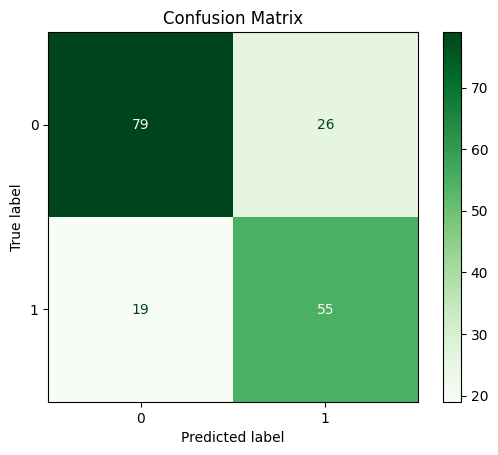

In [59]:
gnb_accuracy = accuracy_score(y_test,gnb_pred)
print("Accuracy : ", gnb_accuracy)

gnb_cm = confusion_matrix(y_test,gnb_pred)

gnb_disp = ConfusionMatrixDisplay(confusion_matrix = gnb_cm, display_labels = gnb_model.classes_)
gnb_disp.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.show()

In [60]:
# Print the classification report
print(classification_report(y_test, gnb_pred, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.81      0.75      0.78       105
    Survived       0.68      0.74      0.71        74

    accuracy                           0.75       179
   macro avg       0.74      0.75      0.74       179
weighted avg       0.75      0.75      0.75       179



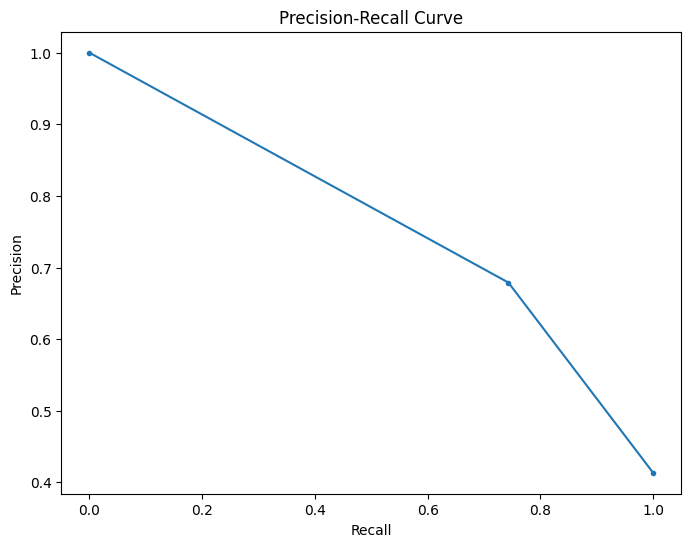

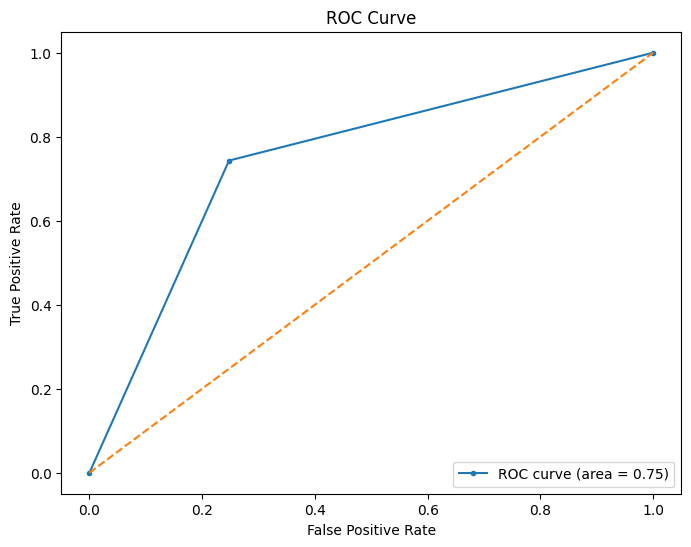

In [61]:

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, gnb_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, gnb_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

**MLPClassifier**

In [62]:
mlp_model = MLPClassifier()
mlp_model.fit(X_train, y_train)
mlp_pred = mlp_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy :  0.8212290502793296


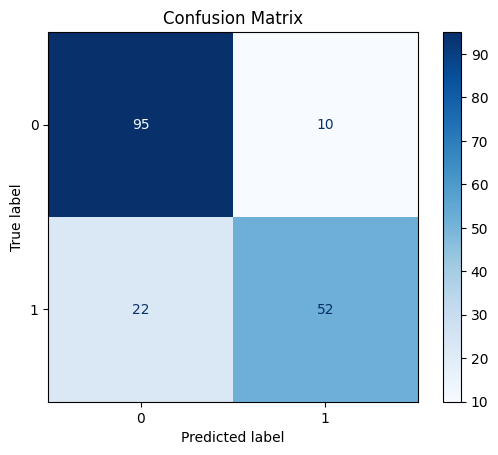

In [63]:
mlp_accuracy = accuracy_score(y_test,mlp_pred)
print("Accuracy : ", mlp_accuracy)

mlp_cm = confusion_matrix(y_test,mlp_pred)

mlp_disp = ConfusionMatrixDisplay(confusion_matrix = mlp_cm, display_labels = mlp_model.classes_)
mlp_disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [64]:
# Print the classification report
print(classification_report(y_test, mlp_pred, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.81      0.90      0.86       105
    Survived       0.84      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



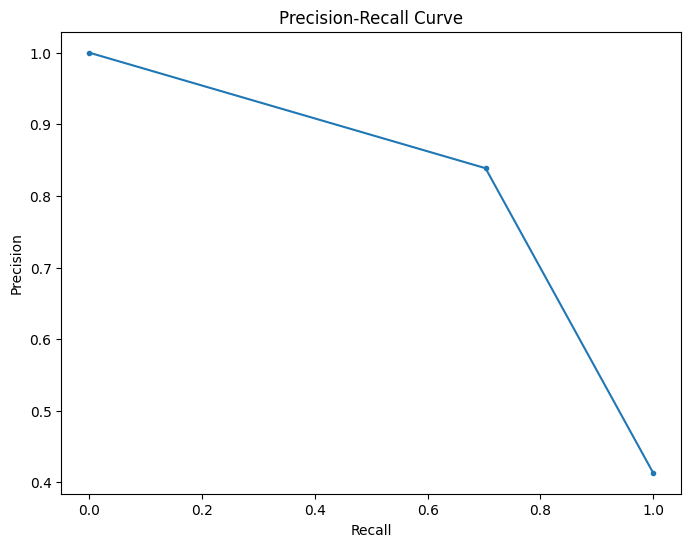

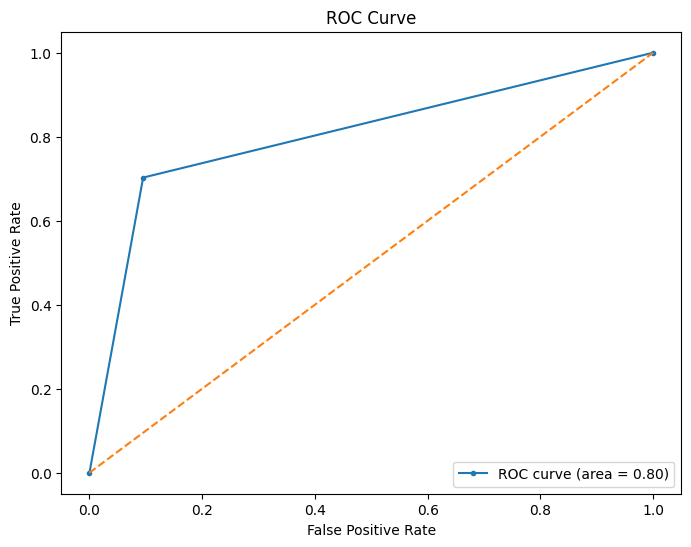

In [65]:

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, mlp_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, mlp_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

## **COMPARISON OF MODELS**

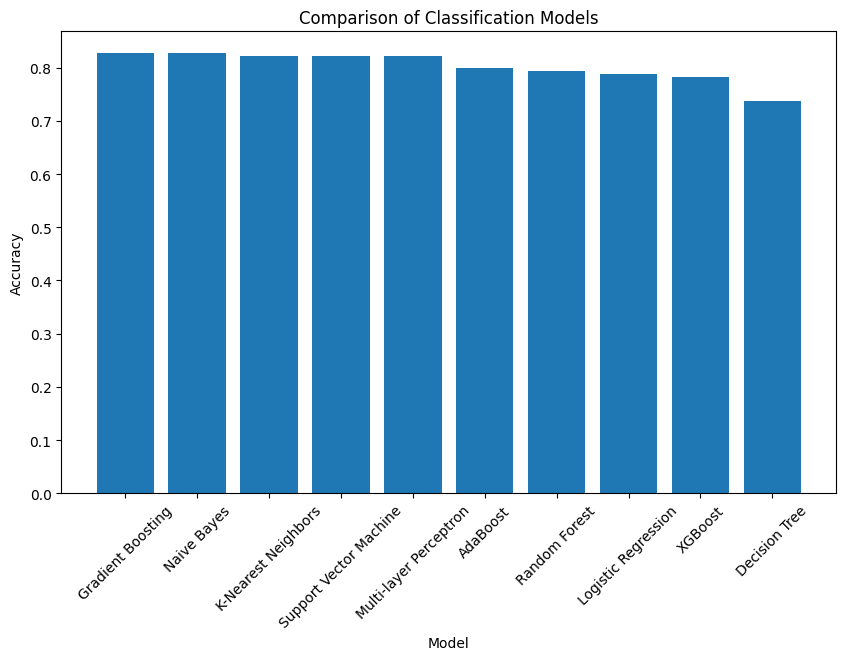

In [66]:

# Create a dictionary to store model names and their R2 values
models_accuracy = {
    "Logistic Regression": log_accuracy,
    "K-Nearest Neighbors": knn_accuracy,
    "Support Vector Machine": svc_accuracy,
    "Decision Tree": dt_accuracy,
    "Random Forest": rf_accuracy,
    "Gradient Boosting": gb_accuracy,
    "AdaBoost": ab_accuracy,
    "Naive Bayes": gb_accuracy,
    "Multi-layer Perceptron": mlp_accuracy,
    "XGBoost": xgb_accuracy
}

# Sort models by descending order of accuracy
sorted_models_accuracy = dict(sorted(models_accuracy.items(), key=lambda item: item[1],reverse = True))

# Plot the comparison
plt.figure(figsize=(10, 6))
plt.bar(sorted_models_accuracy.keys(), sorted_models_accuracy.values())
plt.title('Comparison of Classification Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()


## **TESTING FOR NEW INPUTS USING GRADIENT BOOSTING REGRESSOR**




In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Survived   891 non-null    int64   
 1   Pclass     891 non-null    float64 
 2   Sex        891 non-null    int64   
 3   Age        891 non-null    float64 
 4   Fare       891 non-null    float64 
 5   Cabin      891 non-null    int64   
 6   Age Group  891 non-null    category
dtypes: category(1), float64(3), int64(3)
memory usage: 43.0 KB


In [ ]:
name = input("Enter your Name : ").lower()
pclass = input("Enter your Pclass : ")
sex = input("Enter your Sex : ").lower()
age = input("Enter your Age : ")
fare = input("Enter your Fare : ")
cabin = input("Enter your Cabin : ").lower()

Enter your Name : nikhil
Enter your Pclass : 2
Enter your Sex : male
Enter your Age : 21
Enter your Fare : 7.85
Enter your Cabin : c85


In [ ]:
sex = val('Sex',sex)
cabin = val('Cabin',cabin)


In [ ]:
new_input = scaler.transform(pd.DataFrame([[pclass,sex,age,fare,cabin]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**Prediction**

In [ ]:
new_pred = rf_model.predict(new_input)

In [ ]:
if new_pred == 1:
  print(f"The Passenger {name} will Survive")
else:
  print(f"The Passenger {name} will Not Survive")

The Passenger nikhil will Not Survive
